# Fluxonium Design with 6 single qubits NEW EVEN SIMPLER look

# Fluxonium Design version 3.2: with this version Ec is 1.00GHz.
# And LP's are 200nm.

## Design&EPR&LOM&GDS

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.terminations.ebeam_marker import Markers

## Markers for ebeam
options = dict(pos_x='4.35mm', pos_y='4.35mm',
                    )
mrk1 = Markers(design, 'marker1', options = options)

options = dict(pos_x='-4.35mm', pos_y='4.35mm',
                    )
mrk2 = Markers(design, 'marker2', options = options)

options = dict(pos_x='-4.35mm', pos_y='-4.35mm',
                    )
mrk3 = Markers(design, 'marker3', options = options)

options = dict(pos_x='4.35mm', pos_y='-4.35mm',
                    )
mrk4 = Markers(design, 'marker4', options = options)


gui.rebuild()

In [4]:
from qiskit_metal.qlibrary.terminations.ebeam_frame import Frame

options = dict(chip='main')
frame = Frame(design, 'frame', options = options)

gui.rebuild()

In [8]:
#Setup the launchpad1 location and orientation

## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-3.99mm', orientation='0',
        lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='3.99mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)



Transmission_Line = {'pin_inputs':
           {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '3970um', 'end_straight': '3970um',
                    # 'start_jogged_extension': jogs_in,
                    # 'anchors': anchors1,
                    }, 
                    'total_length': '8mm', 'fillet': "90um"
            }

TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()

In [9]:
## Q1 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-2.66mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-1.33mm', orientation='0',
                     lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)


## Q2 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='0.0mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='+1.33mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)


## Q3 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='2.66mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='3.99mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='2.66mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='1.33mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)


## Q5 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='0.0mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB5', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-1.33mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL5', options = launch_options)


## Q6 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-2.66mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB6', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-3.99mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL6', options = launch_options)


gui.rebuild()

In [4]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

# Q6 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.2mm', pos_y = '-3.2mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))


# Q2 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        **options))

# Q5 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '-0.8mm',
        gds_cell_name=gds_cell_name_jj,
               gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
                      
    flux_bias_line_options=Dict(make_fbl = True,
         fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        **options))


# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.5mm', pos_y = '3.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))

# Q4 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '2.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = True,
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        **options))

# Q JJ1 Trial details
options = dict(chip='main',  nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ1 = FluxoniumPocket(design,'QJJ1', options = dict(
        **options))

# Q JJ2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.2mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,   
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ2 = FluxoniumPocket(design,'QJJ2', options = dict(
        **options))

# Q JJ3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.4mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,  
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ3 = FluxoniumPocket(design,'QJJ3', options = dict(
        **options))


# Q Array1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '1.0mm', pos_y = '0.6mm',
            gds_cell_inductor=gds_cell_name_inductor , pocket_width= '600um',
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                        ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
               ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr1 = FluxoniumPocket(design,'QArr1', options = dict(
             **options))


# Q Array2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '0.8mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor ,   
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                               ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr2 = FluxoniumPocket(design,'QArr2', options = dict(
        **options))

# Q Array3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor , 
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                      ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr3 = FluxoniumPocket(design,'QArr3', options = dict(
        **options))


gui.rebuild()

In [5]:
# Lambda/2 resonator for Q1
otg1 = OpenToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-37.733um', pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.853mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))


gui.rebuild()

In [6]:
# Lambda/2 resonator for Q6
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='37.733um',  pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))


gui.rebuild()

In [7]:
# Lambda/2 resonator for Q2
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-37.733um',  pos_y='-0.2mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='9.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))


gui.rebuild()

In [8]:
# Lambda/2 resonator for Q5
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='37.733um',  pos_y='-0.9mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='10.2mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))


gui.rebuild()

In [9]:
# Lambda/2 resonator for Q3
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-37.733um',  pos_y='2.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))


gui.rebuild()

In [10]:
# Lambda/2 resonator for Q4
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='37.733um',  pos_y='2.0mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.9mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

In [17]:
# Charge Line and Flux Bias Line for Q1
XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='150um', end_straight='600um', 
                     ),
            pin_inputs=Dict(start_pin=Dict(component='Q1', pin='charge_line'),
                            end_pin=Dict(component='LPCL1', pin='tie')
                                            )))

gui.rebuild()

In [18]:
# Charge Line and Flux Bias Line for Q1
ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='200um', 
        end_straight='400um'),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

In [19]:
# Charge Lıne and Flux Bias Line for Q2
XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                        fillet='80um',
                lead=dict(start_straight='150um', end_straight='850um'),
                pin_inputs=Dict(start_pin=Dict(component='Q2', pin='charge_line'),
                                    end_pin=Dict(component='LPCL2',pin='tie')
                                            )))

gui.rebuild()

In [20]:
# Charge Lıne and Flux Bias Line for Q2
ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
        pin_inputs=Dict(start_pin=Dict(component='Q2', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB2',pin='tie')
                                            )))

gui.rebuild()

In [21]:
# Charge Lıne and Flux Bias Line for Q3
XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='450um'), 
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='charge_line'),
                    end_pin=Dict(component='LPCL3', pin='tie')
                                            )))
gui.rebuild()

In [22]:
# Charge Lıne and Flux Bias Line for Q3
ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um'),
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='flux_bias_line'),
                end_pin=Dict(component='LPFB3', pin='tie')
                                            )))

gui.rebuild()

In [23]:
# Charge Lıne and Flux Bias Line for Q6
XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='100um', end_straight='650um'),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

In [24]:
# Charge Lıne and Flux Bias Line for Q6
ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='350um', end_straight='650um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

In [25]:
# Charge Lıne and Flux Bias Line for Q5
XYCharge_LineQ5 = RoutePathfinder(design, 'XY_Gate5', options = dict(chip='main',
                          fillet='99um',
            lead=dict(start_straight='250um', end_straight='650um'),
                    pin_inputs=Dict(start_pin=Dict(component='Q5',pin='charge_line'),
                    end_pin=Dict(component='LPCL5', pin='tie')
                                            )))

gui.rebuild()

In [26]:
# Charge Line and Flux Bias Line for Q5
ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                        fillet='99um',
            lead=dict(start_straight='200um', end_straight='450um'),
                pin_inputs=Dict(start_pin=Dict(component='Q5', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB5', pin='tie')
                                            )))
gui.rebuild()

In [27]:
# Charge Line and Flux Bias Line for Q4
XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                    fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um'),pin_inputs=Dict(
                        start_pin=Dict(component='Q4', pin='charge_line'),
                            end_pin=Dict(component='LPCL4', pin='tie')
                                            )))
gui.rebuild()

In [28]:
# Charge Lıne and Flux Bias Line for Q4
ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um'), pin_inputs=Dict(
                            start_pin=Dict(component='Q4',
                                pin='flux_bias_line'),
                                end_pin=Dict(component='LPFB4',
                                        pin='tie')
                                            )))
gui.rebuild()

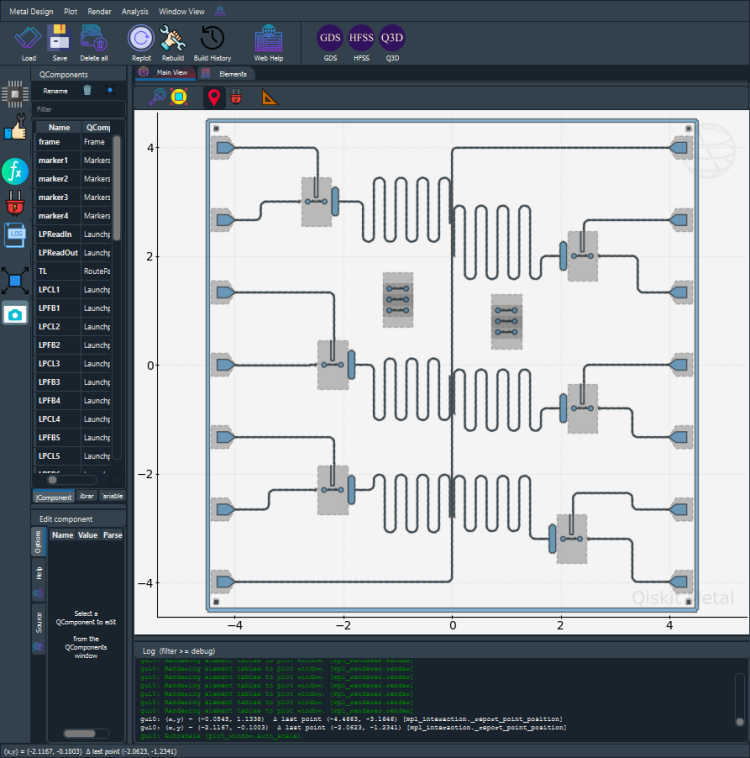

In [29]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [30]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-2.3mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'inductor_orientation': '-1',                         
  'pad_width'         : '15um',                       
  'pad_height'        : '110um',                      
  'pad_radius'        : '45um',                       
  'l_width'           : '1um',                        
  'array_length'      : '130um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_pe

# LOM Fluxonium Qubits

In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer


In [3]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

gui = MetalGUI(design)

In [4]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
           ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,  
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

gui.rebuild()
#gui.autoscale()

## 2. Capacitance Analysis and LOM derivation using the analysis package - most users

In [5]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [6]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [7]:
# for second method. dont run this
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [9]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 08:26PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 08:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:26PM [analyze]: Analyzing setup Setup
INFO 08:27PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp87g5wq35.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:27PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp06oi8vw6.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:27PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp_1x6dd91.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 08:27PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp2zkwwteh.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSi

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,22.18799,-0.11993,-21.15965,-0.06695,-0.60029,-0.04555
flux_bias_line_Q1,-0.11993,59.09640,-45.16625,-4.77768,-4.80576,-2.20016
ground_main_plane,-21.15965,-45.16625,348.70357,-21.79906,-25.61382,-166.38354
pad_bot_Q1,-0.06695,-4.77768,-21.79906,37.03784,-3.51687,-5.45498
pad_top_Q1,-0.60029,-4.80576,-25.61382,-3.51687,37.00443,-1.05779
readout_padNline_Q1,-0.04555,-2.20016,-166.38354,-5.45498,-1.05779,177.52915


In [48]:
# capacitance with pocket-height=650um

Cpad_top = 18.939
Cpad_bot = 15.424
Creadout_bot = 4.86
Ccharge_top = 0.202
Cfluxpad_top = 4.53
Cfluxpad_bot = 4.51

C_pads = 3.159

C_top = Cpad_top + Ccharge_top + Cfluxpad_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('Total Capacitance:', Csigma, 'fF')

Total Capacitance: 15.268744640462188 fF


In [49]:
e = 1.60217663e-19
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')

Charging Energy: 1268.6196305473175 MHz


In [59]:
disconnect_ansys()

NameError: name 'disconnect_ansys' is not defined

In [34]:
# capacitance with pocket-height=650um

Cpad_top = 20.654
Cpad_bot = 20.317
Creadout_bot = 4.90
Ccharge_top = 0.260
Cfluxpad_top = 6.080
Cfluxpad_bot = 6.053

C_pads = 3.1

C_top = Cpad_top + Ccharge_top + Cfluxpad_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('Total Capacitance:', Csigma, 'fF')

Total Capacitance: 17.58754599752849 fF


In [35]:
e = 1.60217663e-19
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')

Charging Energy: 1101.360541568818 MHz


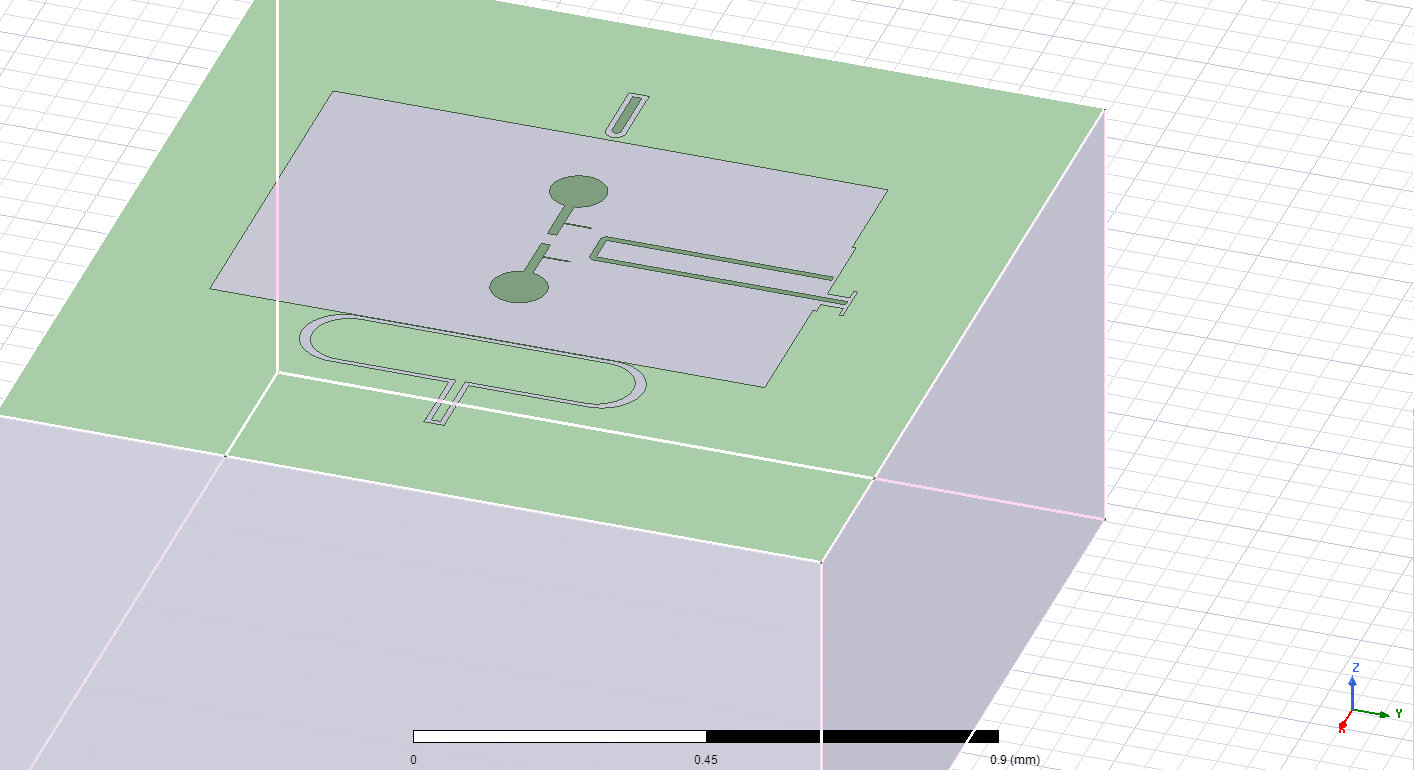

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [51]:
c1.sim.save_screenshot()

In [12]:
c1.setup.junctions = Dict({'Lj': 34.38, 'Cj': 0})
c1.setup.freq_readout = [6.0]
#c1.setup.freq_bus = [5.0, 6.0]

c1.run_lom()
c1.lumped_oscillator_all

[3, 4] [5 0 1]
Predicted Values

Transmon Properties
f_Q 4.888994 [GHz]
EC 990.249826 [MHz]
EJ 4.752635 [GHz]
alpha -893.207995 [MHz]
dispersion 1120681.654606 [KHz]
Lq 34.366136 [nH]
Cq 19.560951 [fF]
T1 149.355912 [us]

**Coupling Properties**

tCqbus1 2.197529 [fF]
gbus1_in_MHz 52.102174 [MHz]
χ_bus1 -2.222434 [MHz]
1/T1bus1 1064.029520 [Hz]
T1bus1 149.577563 [us]

tCqbus2 -0.266779 [fF]
gbus2_in_MHz -6.338925 [MHz]
χ_bus2 -0.032896 [MHz]
1/T1bus2 1.574973 [Hz]
T1bus2 101052.458630 [us]

tCqbus3 -0.015609 [fF]
gbus3_in_MHz -0.382101 [MHz]
χ_bus3 -0.000093 [MHz]
1/T1bus3 0.004095 [Hz]
T1bus3 38865790.068461 [us]
Bus-Bus Couplings
gbus1_2 0.256827 [MHz]
gbus1_3 7.345993 [MHz]
gbus2_3 0.512814 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,4.991597,1047.915155,4.752635,-838.069932,1276688.669926,"[53.68541978617246, -5.766869029843583, -1.583...","[-2.6377407494347085, -0.030436841212071183, -...",2.637741,53.685420
2,5.000636,1053.079309,4.752635,-832.629739,1290934.497133,"[47.27498754420211, -6.1273741753420525, -0.71...","[-2.066085444298908, -0.03470837136684043, -0....",2.066085,47.274988
3,5.002565,1054.182823,4.752635,-831.457031,1293984.248559,"[48.430485223501705, -6.037125679883965, -0.30...","[-2.172986480504994, -0.03376601568312964, -6....",2.172986,48.430485
4,4.974482,1038.172936,4.752635,-848.115982,1249932.692333,"[49.73913791043551, -6.0087707479433785, -0.89...","[-2.221766494219224, -0.03242449158320633, -0....",2.221766,49.739138
5,4.95109,1024.935792,4.752635,-861.30198,1213832.228634,"[50.39144426935863, -6.1055898498704995, -0.67...","[-2.222715347153585, -0.03263063233587006, -0....",2.222715,50.391444
6,4.934626,1015.674542,4.752635,-870.201963,1188752.781756,"[51.338296778270056, -6.181584591369718, -0.79...","[-2.266122033074175, -0.03285488975790923, -0....",2.266122,51.338297
7,4.917745,1006.226444,4.752635,-878.998828,1163321.719329,"[52.131084011887005, -6.21411541982495, -0.455...","[-2.2944508861599675, -0.03260197314857188, -0...",2.294451,52.131084
8,4.904934,999.089596,4.752635,-885.450866,1144217.026156,"[52.29452207220183, -6.288878411743672, -0.497...","[-2.277321057692651, -0.03293504505315278, -0....",2.277321,52.294522
9,4.896056,994.160476,4.752635,-889.808574,1131075.924379,"[52.294219264597075, -6.307463701090494, -0.45...","[-2.2557735489767947, -0.032816907473340935, -...",2.255774,52.294219
10,4.891482,991.626661,4.752635,-892.017023,1124337.995817,"[52.15934668060694, -6.327192150081989, -0.393...","[-2.233227661208055, -0.03286175548513098, -9....",2.233228,52.159347


In [52]:
c1.sim.disconnect_ansys()

AttributeError: 'LumpedElementsSim' object has no attribute 'disconnect_ansys'

## EPR


In [12]:
hfss.open_ansys()

In [13]:
hfss.connect_ansys()

INFO 12:29PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:29PM [load_ansys_project]: 	Opened Ansys App
INFO 12:29PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 12:29PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    //tudelft.net/staff-homes/Y/figenyilmaz/My Documents/Ansoft/
	Project:   Project10
INFO 12:29PM [connect_design]: No active design found (or error getting active design).
INFO 12:29PM [connect]: 	 Connected to project "Project10". No design detected


In [14]:
hfss.activate_eigenmode_design("Q1-Res1")

12:29PM 58s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
12:29PM 58s WARNING [activate_ansys_design]: The design_name=Q1-Res1 was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 12:30PM [connect_design]: 	Opened active design
	Design:    Q1-Res1 [Solution type: Eigenmode]
WARNING 12:30PM [connect_setup]: 	No design setup detected.
WARNING 12:30PM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:30PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [173]:
hfss.activate_eigenmode_design("Res1-11")

10:50AM 16s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
10:50AM 16s WARNING [activate_ansys_design]: The design_name=Res1-11 was not in active project.  Designs in active project are: 
['Res1-2', 'FluxoniumEPR_hfss', 'Res1', 'Res1-9', 'Res1-10', 'Res1-4', 'Res1-7', 'Res1-5', 'Res1-8', 'Res1-3', 'Res1-6'].  A new design will be added to the project.  
INFO 10:50AM [connect_design]: 	Opened active design
	Design:    Res1-11 [Solution type: Eigenmode]
WARNING 10:50AM [connect_setup]: 	No design setup detected.
WARNING 10:50AM [connect_setup]: 	Creating eigenmode default setup.
INFO 10:50AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [174]:
hfss.render_design(['cavity1'], [('cavity1', 'end'), ('cavity1', 'start')])

In [15]:
hfss.render_design(['Q1', 'cavity1', 'otg1s'],[('cavity1', 'end')])

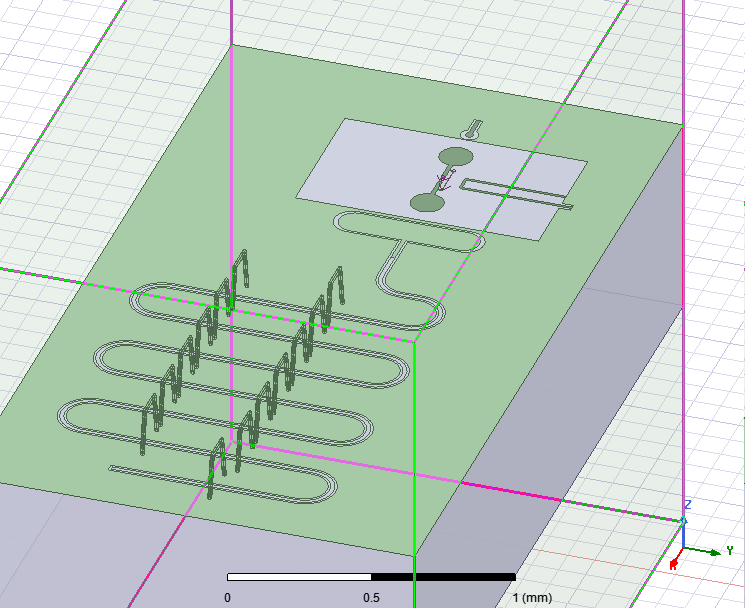

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [16]:
hfss.save_screenshot()

In [175]:
# Analysis properties
setup = hfss.pinfo.setup
#setup.n_modes = 1
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '34.38 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 10:50AM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


09:02PM 16s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


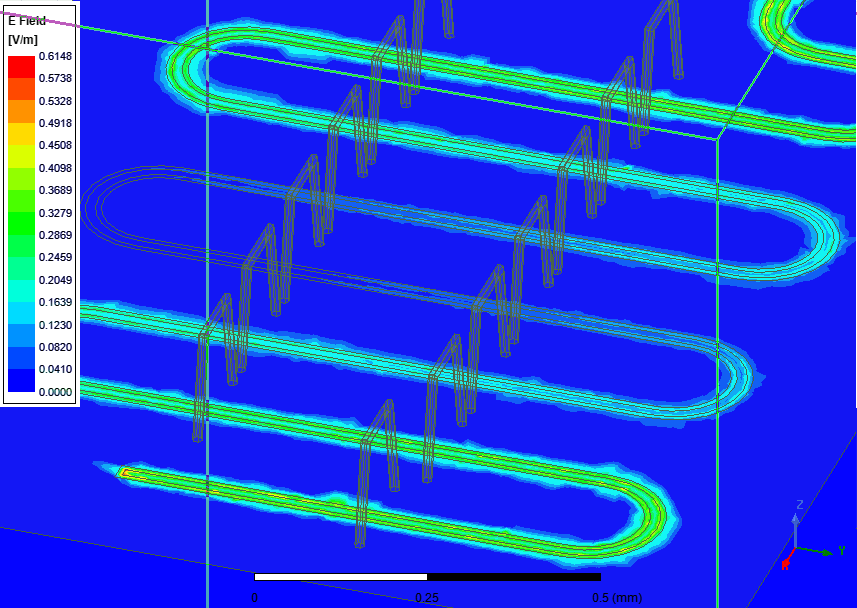

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [83]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [19]:
hfss.plot_ansys_delete(['Mag_E1'])

12:47PM 04s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [20]:
hfss.set_mode(2, "Setup")

INFO 12:47PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


12:47PM 23s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


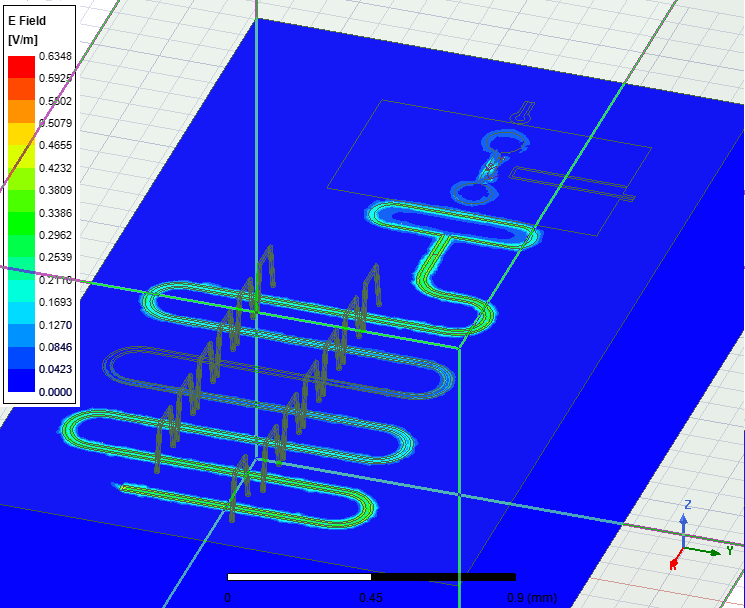

WindowsPath('C:/Users/figenyilmaz/GitLab/qiskit-metal/Fluxonium Designs/ansys.png')

In [21]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [24]:
hfss.plot_ansys_delete(['Mag_E1'])

12:48PM 43s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [176]:
hfss.epr_get_frequencies()

Design "Res1-11" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,6.803529,inf


In [35]:
??hfss.epr_get_Qsurface_all(1, '0')

Object `hfss.epr_get_Qsurface_all(1, '0')` not found.


In [11]:
import pyEPR

print(pyEPR.config.dissipation)

{'tan_delta_sapp': 1e-06, 'epsi': 10, 'th': 3e-09, 'eps_r': 10, 'tan_delta_surf': 0.001, 'surface_Rs': 2.5e-07, 'gseam': 1000.0, 'dielectric_surfaces': {'trace': {'tan_delta_surf': 0.001, 'th': 5e-09, 'eps_r': 10}, 'gap': {'tan_delta_surf': 0.001, 'th': 2e-09, 'eps_r': 10}}}


In [12]:
eig_qb = EPRanalysis(design,"hfss")

In [13]:
eig_qb.sim.setup_update(n_modes = 2,
                        max_delta_f = 0.1,
                        min_freq_ghz = 1,
                        max_passes = 12)
eig_qb.sim.setup.vars.Lj = '57.77nH' #E_j is 2.8270GHz
eig_qb.sim.setup.vars.Cj = '0.0nH'
#eig_qb.sim.setup.vars.Ls = q1.options.l_inductance
eig_qb.sim.setup.vars.Ls = '181.47nH' #E_L is 0.900GHz

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.1,
 'max_passes': 12,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '57.77nH', 'Cj': '0.0nH', 'Ls': '181.47nH'}}

In [14]:
qubit_nr = '1'
eig_qb.sim.run(name="FluxoniumEPR", components=['Q'+qubit_nr, 'cavity'+qubit_nr, 'otg1s'], open_terminations=[], box_plus_buffer = True)

INFO 07:05PM [connect_project]: Connecting to Ansys Desktop API...
INFO 07:05PM [load_ansys_project]: 	Opened Ansys App
INFO 07:05PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 07:05PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    //tudelft.net/staff-homes/Y/figenyilmaz/My Documents/Ansoft/
	Project:   Project16
INFO 07:05PM [connect_design]: No active design found (or error getting active design).
INFO 07:05PM [connect]: 	 Connected to project "Project16". No design detected
INFO 07:06PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
WARNING 07:06PM [connect_setup]: 	No design setup detected.
WARNING 07:06PM [connect_setup]: 	Creating eigenmode default setup.
INFO 07:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:06PM [analyze]: Analyzing setup Setup
07:14PM 28s INFO [get_f_convergence]: Sa

In [15]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,3.537492,4.355093
2,4.369505,4.967079
3,5.332160,5.395977
4,5.608496,5.966072
5,5.786476,6.085499
6,5.918415,6.177775
7,5.974090,6.215757
8,5.985688,6.235911
9,5.995696,6.265250


In [16]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q1_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q1_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 20
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_inductor',
   'line': 'JJ_Lj_Q1_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 20,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [17]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1
Design "FluxoniumEPR_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 3.01010427241754e-24
        energy_elec_substrate = 2.76721167530201e-24
        EPR of substrate = 91.9%

        energy_mag    = 2.95228235965768e-24
        energy_mag % of energy_elec_all  = 98.1%
        

Variation 0  [1/1]

  Mode 0 at 6.00 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                1.9%  1.505e-24 1.476e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 85.88%
	jj              0.00974796  (+)        0.0016024
		Energy fraction (Lj over Lj&Cj)= 65.95%
	inductor        0.00310964  (+)        0.00160572
		(U_tot_cap-U_tot_ind)/mean=0

In [18]:
s

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_inductor',
   'line': 'JJ_Lj_Q1_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 20,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [19]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

WARNING 07:30PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 07:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 54.3% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[5.7770e-08 1.8147e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.10152691317481342
ϕzpf mode 1 :  0.9106713417478818
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode
[[0.10152691]
 [0.91067134]]
qubit mode 1
N_HO: [0]


ERROR 07:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 54.3% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.378323
1    1.763582
dtype: float64

Pm_norm idx =
      jj  inductor
0  False     False
1   True     False
*** P (participation matrix, not normlz.)
         jj  inductor
0  0.009717  0.003100
1  0.418598  0.133522

*** S (sign-bit matrix)
   s_jj  s_inductor
0     1           1
1     1           1
*** P (participation matrix, normalized.)
    0.0097
      0.74

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
      0.15     24.2
      24.2      973

*** Chi matrix ND (MHz) 
  -0.00444    -2.45
     -2.45-1.32e+03

*** Frequencies O1 PT (MHz)
0    5990.95492
1    5372.18478
dtype: float64

*** Frequencies ND (MHz)
0    6009.491828
1    5227.086818
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,57.77
0,6009.49
1,5227.09


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0        1
Lj                        
57.77 0 -4.44e-03    -2.45
      1 -2.45e+00 -1320.76

In [20]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(-1,2.0,201)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][1])
    freq_r.append(a['0'][0])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

In [21]:
%matplotlib inline

In [22]:
with open('simulated_data-res.npy', 'wb') as f:
    np.save(f, phis)
    np.save(f, np.array(freq_r)/1000)
    np.save(f, np.array(freq_q)/1000)

(5.993, 6.0201)

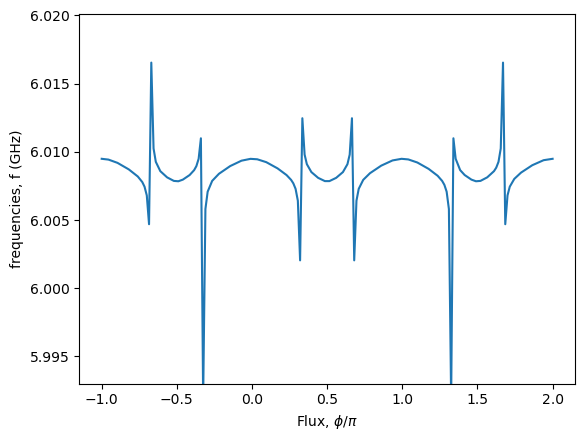

In [23]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(5.993,6.0201)

(-1.0, 2.0)

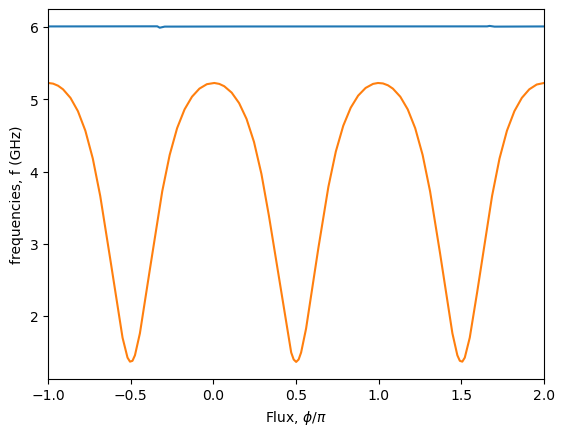

In [24]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.xlim(-1,2)

Text(0, 0.5, 'Dispersive Shift, $\\chi/2\\pi$ (MHz)')

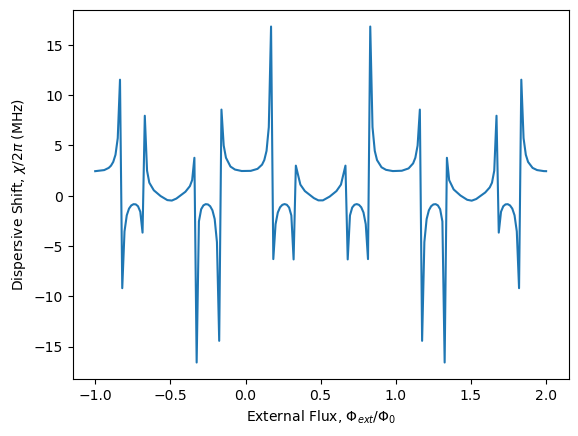

In [25]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')
#plt.ylim(-20,10)

# Qubit 1

In [72]:
eig_qb.sim.setup_update(n_modes = 2,
                        max_delta_f = 0.1,
                        min_freq_ghz = 1,
                        max_passes = 12)
eig_qb.sim.setup.vars.Lj = '34.3nH' # targetted E_j=4.75GHz
eig_qb.sim.setup.vars.Cj = '0.0nH'
eig_qb.sim.setup.vars.Ls = q1.options.l_inductance

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.1,
 'max_passes': 12,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '34.3nH', 'Cj': '0.0nH', 'Ls': '200nH'},
 'run': {'name': 'FluxoniumEPR',
  'components': ['Q5', 'cavity5', 'otg5s'],
  'open_terminations': [],
  'port_list': None,
  'jj_to_port': None,
  'ignored_jjs': None,
  'box_plus_buffer': True}}

In [52]:
eig_qb.sim.run(name="FluxoniumEPR", components=['Q1', 'cavity1', 'otg1s'], open_terminations=[], box_plus_buffer = True)

INFO 04:21PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 04:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:21PM [analyze]: Analyzing setup Setup
04:30PM 22s INFO [get_f_convergence]: Saved convergences to C:\Users\figenyilmaz\GitLab\qiskit-metal\Fluxonium Designs\hfss_eig_f_convergence.csv


In [73]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,3.423211,3.901086
2,4.182607,4.647629
3,4.690390,5.488740
4,5.021155,5.854751
5,5.084940,6.056725
6,5.183961,6.190845
7,5.241568,6.246473
8,5.263635,6.299272
9,5.275885,6.335470


In [74]:
# Add the geometry of the rectangle  and line of the inductor to the list of junctions
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'

eig_qb.add_junction(name_junction ='inductor')
eig_qb.setup.junctions.inductor.Lj_variable = 'Ls'
eig_qb.setup.junctions.inductor.rect = 'JJ_rect_Lj_Q1_inductor'
eig_qb.setup.junctions.inductor.line = 'JJ_Lj_Q1_inductor_'
# eig_qb.setup.junctions.inductor.is_junction = False

# Set up th EPR analysis parameters
eig_qb.setup.fock_trunc = 15
eig_qb.setup.cos_trunc = 6
eig_qb.setup.flux = 0.0

eig_qb.setup.basis = 'HO'

# eig_qb.setup.sweep_variable = 'flux'   #--- This would be nice to implement to get a sweep over flux bias 
eig_qb.setup

06:44PM 16s WARNING [add_junction]: junction already defined. Overwriting inductor


{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'},
  'inductor': {'Lj_variable': 'Ls',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_inductor',
   'line': 'JJ_Lj_Q1_inductor_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 6,
 'fock_trunc': 15,
 'flux': 0.0,
 'basis': 'HO',
 'sweep_variable': 'Lj'}

In [75]:
# eig_qb.run_epr()
#### equivalent individual calls
s = eig_qb.setup
eig_qb.epr_start()
eig_qb.get_stored_energy()
eig_qb.run_analysis()

AssertionError: pyEPR ProjectInfo user error found 😷:
                    Seems like for junction `jj` you specified a rect that does not exist
                    in HFSS by the name: `JJ_rect_Lj_Q1_rect_jj` 

In [59]:
eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
eig_qb.report_hamiltonian(s.sweep_variable)

WARNING 04:45PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 04:45PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 66.2% is > 15%.                     
Is the simulation converged? Proceed with caution


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

[8.43e-08 2.00e-07]
[0]
Using Full Cosine Potential
ϕzpf mode 0 :  0.30272768326740995
ϕzpf mode 1 :  0.9649705491055717
Starting the diagonalization
Finished the diagonalization
(2, 1)
Single junctions -- assuming single qubit mode


IndexError: list index out of range

In [ ]:
from IPython.display import clear_output
chis = []
freq_q = []
freq_r = []
phis = np.linspace(0,1,301)
for phi in phis:
    eig_qb.setup.flux = phi
    s = eig_qb.setup
    eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc, basis=s.basis, flux=s.flux, junctions=[0])
    a = eig_qb.sim.renderer.epr_quantum_analysis.get_frequencies()
    freq_q.append(a['0'][1])
    freq_r.append(a['0'][0])
    b = eig_qb.sim.renderer.epr_quantum_analysis.get_chis()
    chi = -b[0][1]
    chis.append(chi)
    clear_output()

In [ ]:
plt.plot(phis,np.array(freq_r)/1000)
plt.plot(phis,np.array(freq_q)/1000)
plt.xlabel(r'Flux, $\phi/\pi$')
plt.ylabel('frequencies, f (GHz)')
plt.ylim(0,10)

In [ ]:
plt.plot(phis,chis)
#plt.xlabel(r'Flux, $\phi/\pi$')
plt.xlabel(r'External Flux, $\Phi_{ext}/\Phi_0$')
plt.ylabel(r'Dispersive Shift, $\chi/2\pi$ (MHz)')
#plt.ylabel(r'Dispersive shift, $\chi$ (MHz)')

## GDS

In [38]:
fluxonium_gds = design.renderers.gds
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [39]:
fluxonium_gds.options['path_filename'] = 'FX22_JJ120andArray410_Circles_V3.2_9by9mm.gds'

In [40]:
fluxonium_gds.options['fabricate'] = True

In [34]:
fluxonium_gds.export_to_gds('FX22-W2-05-V3.2.gds')

08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q1 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q6 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q2 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q5 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q3 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q4 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_import_junctions_to_one_cell]: From the "junctio

1

In [30]:
# View every entry in junction table.
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,16,inductor,"LINESTRING (-2.13500 -2.27700, -2.26500 -2.27700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
1,16,rect_jj,"LINESTRING (-2.18500 -2.30000, -2.21500 -2.30000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
2,17,inductor,"LINESTRING (2.26500 -3.17700, 2.13500 -3.17700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
3,17,rect_jj,"LINESTRING (2.21500 -3.20000, 2.18500 -3.20000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
4,18,inductor,"LINESTRING (-2.13500 0.02300, -2.26500 0.02300)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
5,18,rect_jj,"LINESTRING (-2.18500 0.00000, -2.21500 0.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
6,19,inductor,"LINESTRING (2.46500 -0.77700, 2.33500 -0.77700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
7,19,rect_jj,"LINESTRING (2.41500 -0.80000, 2.38500 -0.80000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
8,20,inductor,"LINESTRING (-2.43500 3.02300, -2.56500 3.02300)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
9,20,rect_jj,"LINESTRING (-2.48500 3.00000, -2.51500 3.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0


In [31]:
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': True,
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': 'FX_JJandArrayCircles_9by9mm.gds',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '200um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '300um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [32]:
gui.main_window.close()

True

In [46]:
c1.disconnect_ansys()

NameError: name 'c1' is not defined